In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from neurodyn import *
from utils import *

In [3]:
phi = sigmoid
I_ext = zero

**We start an RNN, p=2, no external current**

(we also assess that exchanging $\mu=0 \leftrightarrow \mu=1$ doesn't change the dynamics -> OK)

simulating LowRankRNN{N=1000, p=2, phi=expit, I_ext=zero}: 100.00%|██████████| t=100.000 of 100 [00:00<00:00]
simulating LowRankRNN{N=1000, p=2, phi=expit, I_ext=zero}: 100.00%|██████████| t=100.000 of 100 [00:00<00:00]
simulating LowRankRNN{N=1000, p=2, phi=expit, I_ext=zero}: 100.00%|██████████| t=100.000 of 100 [00:00<00:00]
simulating LowRankRNN{N=1000, p=2, phi=expit, I_ext=zero}: 100.00%|██████████| t=100.000 of 100 [00:00<00:00]
simulating LowRankRNN{N=1000, p=2, phi=expit, I_ext=zero}: 100.00%|██████████| t=100.000 of 100 [00:00<00:00]
simulating LowRankRNN{N=1000, p=2, phi=expit, I_ext=zero}: 100.00%|██████████| t=100.000 of 100 [00:00<00:00]
simulating LowRankRNN{N=1000, p=2, phi=expit, I_ext=zero}: 100.00%|██████████| t=100.000 of 100 [00:00<00:00]
simulating LowRankRNN{N=1000, p=2, phi=expit, I_ext=zero}: 100.00%|██████████| t=100.000 of 100 [00:00<00:00]
simulating LowRankRNN{N=1000, p=2, phi=expit, I_ext=zero}: 100.00%|██████████| t=100.000 of 100 [00:01<00:00]
simulating

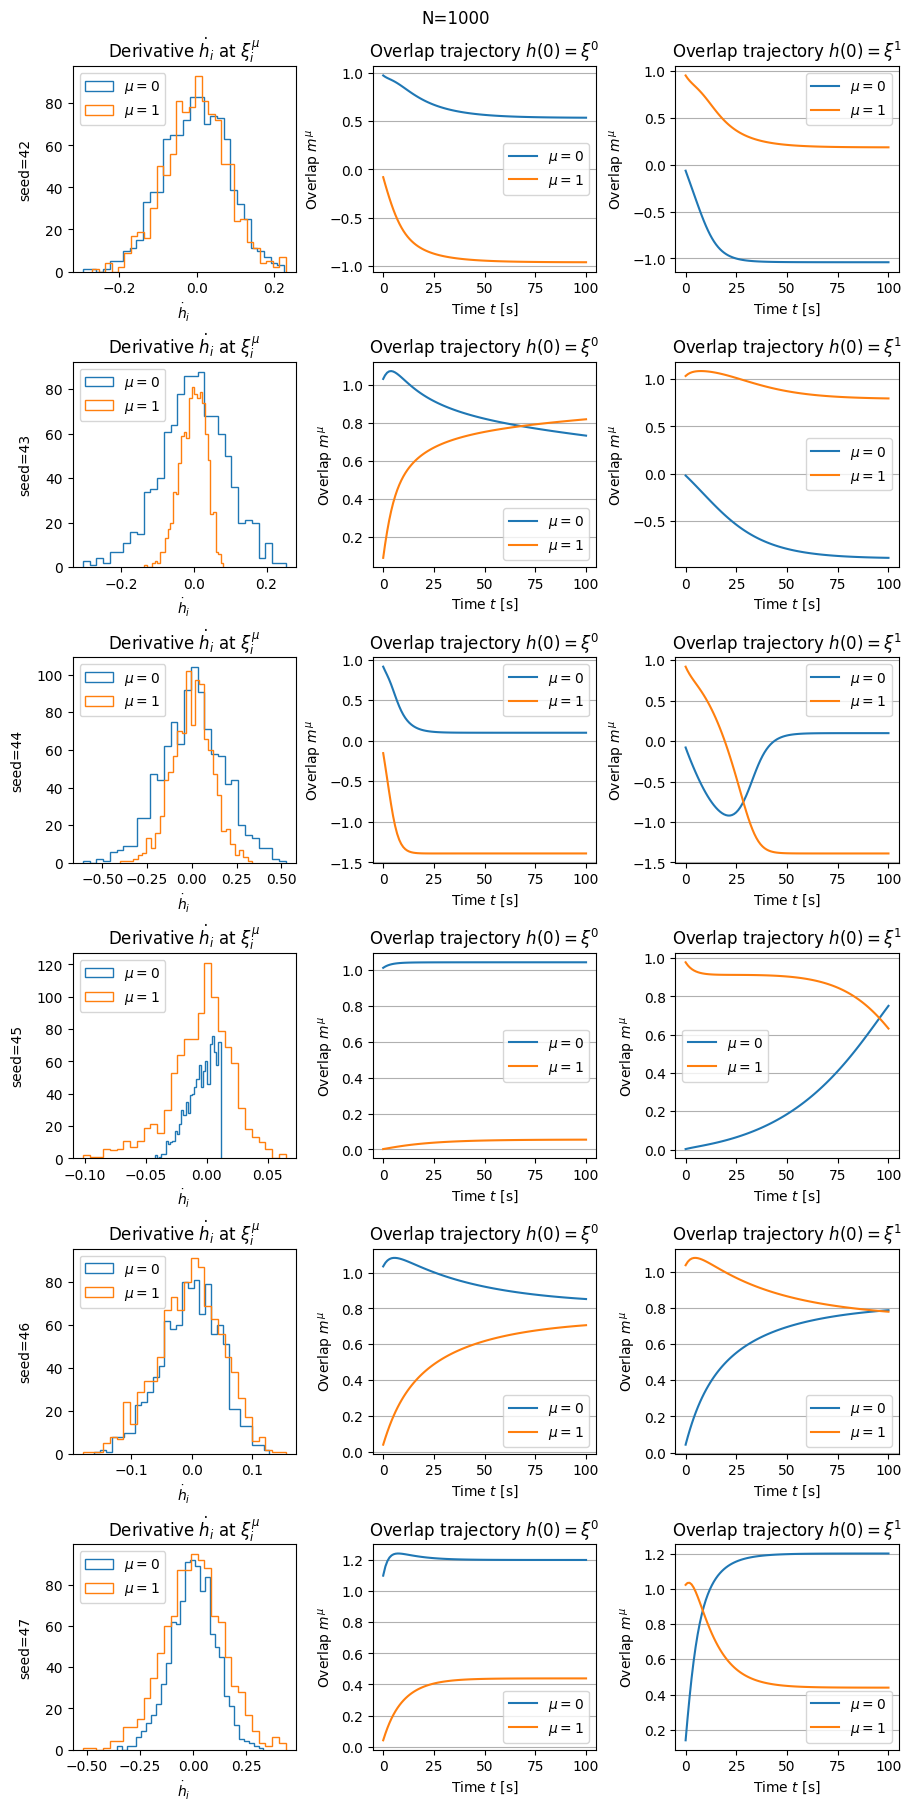

In [21]:
# for N in [1000, 10_000, 50_000, 100_000, 500_000, 1_000_000]:
for N in [1000]:
	seeds = [ 42, 43, 44, 45, 46, 47 ]
	# flipped = [True, False]  # DEBUG
	# configs = list(itertools.product(seeds, flipped))  # DEBUG
	configs = list(seeds)

	fig, axes = plt.subplots(ncols=3, nrows=len(configs), figsize=(9, 3*len(configs)), constrained_layout=True)
	fig.suptitle(f'N={N}')

	# for row, (seed, flip) in enumerate(configs):  # DEBUG
	for row, seed in enumerate(configs):
		F, G = make_F_G_valentin(p=2, N=N, phi=sigmoid, random_state=seed)
		# if flip:  # DEBUG
		# 	F = np.roll(F, shift=1, axis=1)  # DEBUG
		# 	G = np.roll(G, shift=1, axis=1)  # DEBUG

		rnn = LowRankRNN(F, G, phi, I_ext)
		plot_dh_hist(rnn, figax=(fig, axes[row, 0]))
		res = rnn.simulate_h(rnn.F[:, 0], (0, 100), dt_max=1, progress=True)
		plot_overlap_trajectory(rnn, res, figax=(fig, axes[row, 1]))
		axes[row, 1].set_title(axes[row, 1].get_title()+' $h(0)=\\xi^{{0}}$')
		res = rnn.simulate_h(rnn.F[:, 1], (0, 100), dt_max=1, progress=True)
		plot_overlap_trajectory(rnn, res, figax=(fig, axes[row, 2]))
		axes[row, 2].set_title(axes[row, 2].get_title()+' $h(0)=\\xi^{{1}}$')

	# add_headers(fig, row_headers=[ f'seed={str(seed)}, {"flip" if flip else "no flip"}' for (seed, flip) in configs ])  # DEBUG
	add_headers(fig, row_headers=[ f'seed={str(seed)}' for seed in configs ])

	plt.show()

**Correlation between two patterns**

In [42]:
def compute_pattern_correlation(N: int, seed: int = 42) -> tuple[float, float]:
	F, G = make_F_G_valentin(p=2, N=N, phi=sigmoid, random_state=seed)
	# np.corrcoef(F.T), np.corrcoef(G.T)
	return np.corrcoef(F[:, 0], F[:, 1])[0, 1], np.corrcoef(G[:, 0], G[:, 1])[0, 1]  # out of diagonal, cross-correlation

Ns = np.logspace(3, 7, 30).astype(int)
seeds = [42, 43, 44, 45]
corrs = [ compute_pattern_correlation(N, seed) for N, seed in itertools.product(Ns, seeds) ]
corrs = np.array(corrs)
corrs = np.abs(corrs)  # we only want the absolute value, which tells the magnitude of the correlation

df = pd.DataFrame(dict(N_seed=list(itertools.product(Ns, seeds)), corr_xi=corrs[:, 0], corr_phi=corrs[:, 1]))
df[['N', 'seed']] = df['N_seed'].tolist()
df.drop(columns=['N_seed'], inplace=True)
df_meancorr = df.groupby('N')[['corr_xi', 'corr_phi']].agg(['mean', 'std']).reset_index()

In [43]:
df_meancorr

N   corr_xi            corr_phi          
                  mean       std      mean       std
0       1000  0.024385  0.022558  0.027083  0.021091
1       1373  0.030593  0.012738  0.028512  0.014275
2       1887  0.015074  0.006900  0.014360  0.003429
3       2592  0.014178  0.006629  0.013120  0.008741
4       3562  0.012541  0.015300  0.010269  0.016340
5       4893  0.012240  0.008715  0.012258  0.008225
6       6723  0.014053  0.012081  0.013477  0.012319
7       9236  0.010082  0.005632  0.009125  0.005744
8      12689  0.004701  0.005399  0.005712  0.005879
9      17433  0.006136  0.004850  0.005824  0.004290
10     23950  0.005040  0.002910  0.005198  0.003228
11     32903  0.003276  0.003951  0.003336  0.004512
12     45203  0.005074  0.002751  0.004949  0.003386
13     62101  0.002988  0.001150  0.002560  0.001658
14     85316  0.004414  0.002686  0.003886  0.002665
15    117210  0.001076  0.000977  0.000834  0.000469
16    161026  0.002690  0.001636  0.002456  0.001793
17    221221  0.002038  0.000606  0.001966  0.000862
18    303919  0.001844  0.001089  0.001780  0.001033
19    417531  0.001392  0.000678  0.001246  0.000637
20    573615  0.000966  0.000801  0.000712  0.000573
21    788046  0.001107  0.000842  0.001226  0.000787
22   1082636  0.001335  0.001006  0.001320  0.001123
23   1487352  0.000674  0.000768  0.000590  0.000745
24   2043359  0.000596  0.000293  0.000606  0.000384
25   2807216  0.000453  0.000372  0.000449  0.000336
26   3856620  0.000188  0.000351  0.000247  0.000350
27   5298316  0.000486  0.000269  0.000419  0.000350
28   7278953  0.000184  0.000158  0.000178  0.000163
29  10000000  0.000247  0.000166  0.000286  0.000164

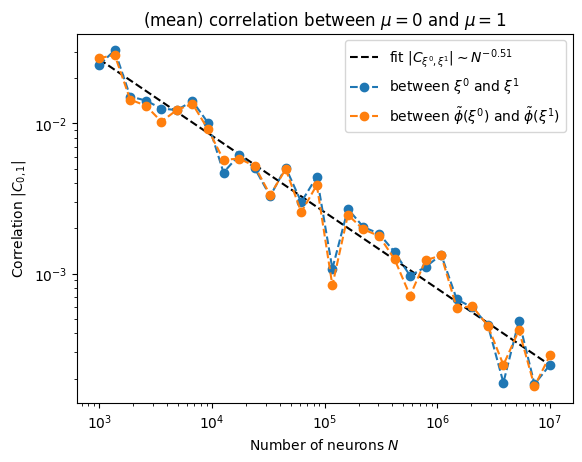

In [45]:
fit = np.poly1d(np.polyfit(np.log10(df_meancorr['N']), np.log10(df_meancorr[('corr_xi', 'mean')]), deg=1))

fig, ax = plt.subplots()
ax.plot(df_meancorr['N'], 10**fit(np.log10(df_meancorr['N'])), 'k--', label=f'fit $|C_{{\\xi^0,\\xi^1}}| \\sim N^{{{fit.coefficients[0]:.2f}}}$')
ax.plot(df_meancorr['N'], df_meancorr[('corr_xi', 'mean')], 'o--', label='between $\\xi^{{0}}$ and $\\xi^{{1}}$')
ax.plot(df_meancorr['N'], df_meancorr[('corr_phi', 'mean')], 'o--', label='between $\\tilde\\phi(\\xi^{{0}})$ and $\\tilde\\phi(\\xi^{{1}})$')
ax.legend()
ax.set_xlabel('Number of neurons $N$')
ax.set_ylabel('Correlation $|C_{{0,1}}|$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('(mean) correlation between $\\mu=0$ and $\\mu=1$')
plt.show()